In [1]:
#meta 1/25/2021 Poker Example 1
#src https://medium.com/@virgoady7/poker-hand-prediction-7a801e254acd
#Claim: Keras nn models predicts much higher than LogR, CART or SVM

#history
#1/25/202 ORIGINAL EXAMPLE + MY CODE DELTA
#      Original code errored out in Keras NN section: problem is with your label-data shape
#      Fixed with $mycodedelta

#here 1/25/202 MANAGE DATA DOWNLOAD
#      Check if data already exists and downloaded if it doesn't


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import warnings
warnings.filterwarnings('ignore')

#from joblib import load, dump

# Poker Example with Keras

## 0. Load Data

In [3]:
#$mycodedelta #was
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
#!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names

In [4]:
#$mycodedelta
#check if data already downloaded
if path.exists('data/poker-hand.names'):
    print('Poker data already exists')
else:
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data -O 'data/poker-hand-testing.data'
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data -O 'data/poker-hand-training-true.data'
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names -O 'data/poker-hand.names'

Poker data already exists


## 1. Prep Data

In [5]:
data_train=pd.read_csv("data/poker-hand-training-true.data",header=None)
data_test = pd.read_csv("data/poker-hand-testing.data",header=None)
col=['Suit of card #1','Rank of card #1','Suit of card #2','Rank of card #2','Suit of card #3','Rank of card #3','Suit of card #4','Rank of card #4','Suit of card #5','Rank of card 5','Poker Hand']
col

['Suit of card #1',
 'Rank of card #1',
 'Suit of card #2',
 'Rank of card #2',
 'Suit of card #3',
 'Rank of card #3',
 'Suit of card #4',
 'Rank of card #4',
 'Suit of card #5',
 'Rank of card 5',
 'Poker Hand']

In [6]:
data_train.columns=col
data_test.columns=col

In [7]:
y_train=data_train['Poker Hand']
y_test=data_test['Poker Hand']
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [8]:
x_train=data_train.drop('Poker Hand',axis=1)
x_test=data_test.drop('Poker Hand',axis=1)

In [9]:
print('Shape of Training Set:',x_train.shape)
print('Shape of Testing Set:',x_test.shape)

Shape of Training Set: (25010, 10)
Shape of Testing Set: (1000000, 10)


In [10]:
x_train.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5
0,1,10,1,11,1,13,1,12,1,1
1,2,11,2,13,2,10,2,12,2,1
2,3,12,3,11,3,13,3,10,3,1
3,4,10,4,11,4,1,4,13,4,12
4,4,1,4,13,4,12,4,11,4,10


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(data_train['Poker Hand'])
y_test=le.transform(data_test['Poker Hand'])

In [12]:
y_train.shape, y_test.shape

((25010,), (1000000,))


## 2. Model 
### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='ovr').fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

### CART
Classification and Regression Trees or CART for short

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

### SVM
We plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate

In [15]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(x_train,y_train) 
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.428005

### Neural Net with Keras
A neural network is a progression of algorithms that attempts to perceive fundamental connections in a lot of information through a procedure that copies the manner in which the human brain works. Neural network can adjust to changing input; so the network produces the most ideal outcome without expecting to redesign the output criteria.
To create NN we used Keras library which is a high-level API wrapper for the low-level API, capable of running on top of TensorFlow, CNTK, or Theano.
My neural network architecture comprised of 3 dense layers with respectively 15,10 and 10 nodes in each layer.

In [16]:
#$mycodedelta
#code below errors out: ValueError: Error when checking target: expected dense_3 to have shape (10,) but got array with shape (1,)
#src https://stackoverflow.com/questions/49392972/error-when-checking-target-expected-dense-3-to-have-shape-3-but-got-array-wi/55992428
#issue: problem is with label-data shape
#      Keras expects y-data in (N, 10) shape, not (N,) 
#      was: y_train.shape, y_test.shape
#      was: ((25010,), (1000000,))
#fix: Recode labels using to_categorical to get the correct shape of inputs
from keras.utils import to_categorical
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

y_train_nn.shape, y_test_nn.shape

Using TensorFlow backend.


((25010, 10), (1000000, 10))

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers


model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_nn, epochs = 10, batch_size = 256, verbose=1,validation_data=(x_test,y_test_nn),shuffle=True) #$mycodedelta


score = model.evaluate(x_test, y_test_nn, batch_size=256) #$mycodedelta

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25010 samples, validate on 1000000 samples
Epoch 1/10
25010/25010 [==============================] - 4s 156us/step - loss: 0.2680 - accuracy: 0.8955 - val_loss: 0.1970 - val_accuracy: 0.8977
Epoch 2/10
25010/25010 [==============================] - 4s 148us/step - loss: 0.1857 - accuracy: 0.8985 - val_loss: 0.1791 - val_accuracy: 0.8996
Epoch 3/10
25010/25010 [==============================] - 4s 151us/step - loss: 0.1769 - accuracy: 0.9001 - val_loss: 0.1749 - val_accuracy: 0.9008
Epoch 4/10
25010/25010 [==============================] - 4s 153us/step - loss: 0.1743 - accuracy: 0.9014 - val_loss: 0.1734 - val_accuracy: 0.9023
Epoch 5/10
25010/25010 [==============================] - 4s 153us/step - loss: 0.1734 - accuracy: 0.9021 - val_loss: 0.1729 - val_accuracy: 0.9026
Epoch 6/10
25010/25010 [==============================] - 4s 148us/step - loss: 0.1730 - accuracy: 0.9025 - val_l

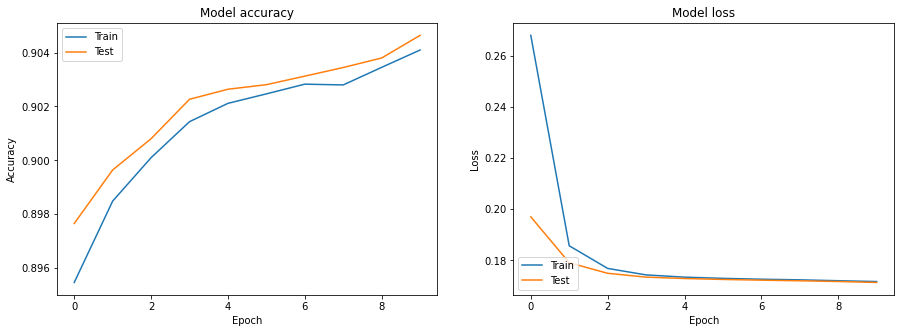

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy']) #$mycodedelta
plt.plot(history.history['val_accuracy'])#$mycodedelta
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')

##### Summary
In the end, the Neural Network using Keras Library enables us to produce the most accurate results above all!

In [19]:
mystop

NameError: name 'mystop' is not defined

## Xtra

In [ ]:
#$xtra my export data for reuse
dump(data_train, 'data/poker_ex1_data_train.pkl')
dump(data_test, 'data/poker_ex1_data_test.pkl')